In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split as split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


from sklearn.metrics import r2_score as score

In [3]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [4]:
train_x, test_x, train_y, test_y = split(x, y, test_size=0.2, random_state=13)

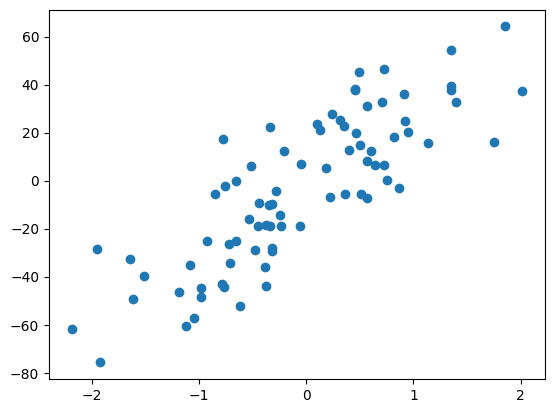

In [5]:
plt.scatter(train_x, train_y)

# Linear Regression
Finding LinearRegression

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(train_x, train_y)
y_pred = linear_regression.predict(test_x)
score(y_pred, test_y)

0.6993779148220458

# Ridge regression
Finding Accuracy using Ridge regression

In [7]:
ridge = Ridge(alpha=10)
ridge.fit(train_x, train_y)
y_pred = ridge.predict(test_x)
score(y_pred, test_y)

0.620919190580342

# Lesso Regression
Using Lasso Regression to find solution

In [8]:
lasso = Lasso(alpha=0.01)
lasso.fit(train_x, train_y)
y_pred = lasso.predict(test_x)
score(y_pred, test_y)

0.6992502452945314

In [9]:
x, y = load_diabetes(return_X_y=True)

In [10]:
train_x, test_x, train_y, test_y = split(x, y, test_size=0.2, random_state=13)

# Using Lasso on Polynomial Datasets 

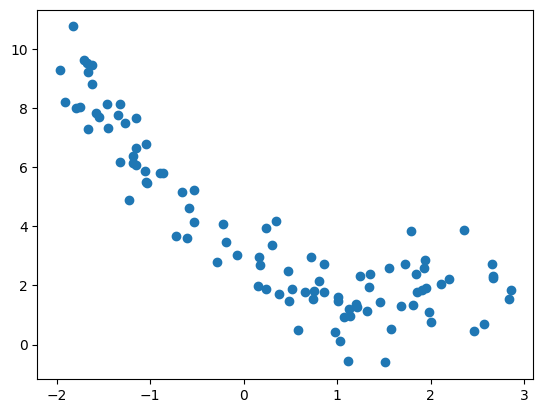

In [11]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [16]:
train_x, test_x, train_y, test_y = split(x1, x2, test_size=0.2)

In [17]:
linear_regression.fit(train_x, train_y)
y_pred = linear_regression.predict(test_x)
score(y_pred, test_y)

0.6175295812100219

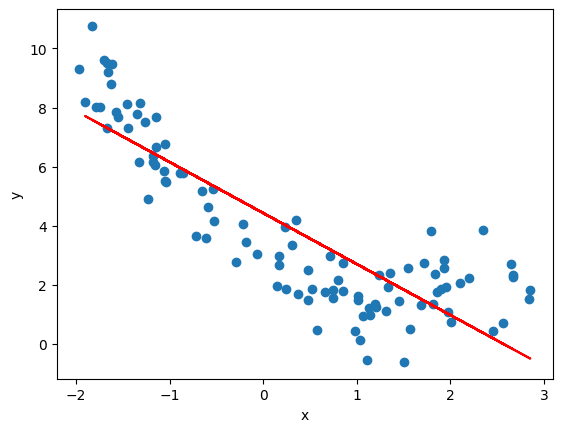

In [19]:
plt.plot(train_x, linear_regression.predict(train_x), color='red')
plt.scatter(x1, x2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Polynomial Regression


In [28]:
polynomial_feature = PolynomialFeatures(degree=2, include_bias=False)

In [29]:
polynomial_feature.fit(train_x)

PolynomialFeatures(include_bias=False)

In [30]:
poly_train_x = polynomial_feature.transform(train_x)
poly_test_x = polynomial_feature.transform(test_x)

In [31]:
linear_regression.fit(poly_train_x, train_y)
y_pred = linear_regression.predict(poly_test_x)
score(y_pred, test_y)

0.7978977689562161

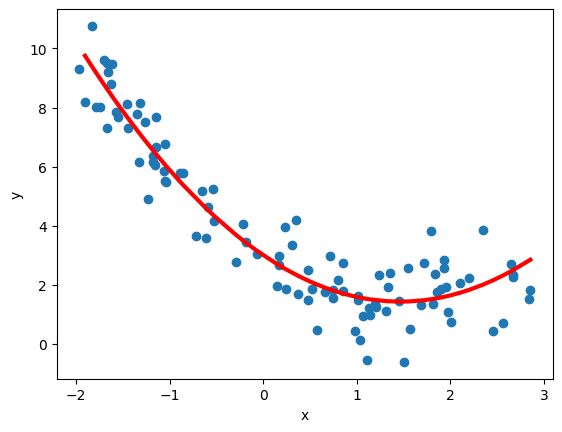

In [59]:


# Plotting Polynomial Regression
sorted_indices = np.argsort(train_x.flatten())
sorted_train_x = train_x[sorted_indices]
sorted_poly_train_x = polynomial_feature.transform(sorted_train_x)

plt.plot(sorted_train_x, linear_regression.predict(sorted_poly_train_x), color='red', linewidth=3)
plt.scatter(x1, x2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()